In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data and convert to grayscale
(x_train, _), (_, _) = cifar10.load_data()
x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()

# Normalize to 0-1 and extract brightness (mean pixel intensity per image)
brightness_values = np.mean(x_train_gray / 255.0, axis=(1, 2, 3))

# Create time-series sequences
seq_length = 10
X, y = [], []
for i in range(len(brightness_values) - seq_length):
    X.append(brightness_values[i:i + seq_length])
    y.append(brightness_values[i + seq_length])

X = np.array(X)
y = np.array(y)

# Reshape for LSTM: (samples, timesteps, features)
X = X[..., np.newaxis]
y = y[..., np.newaxis]

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define LSTM model in TensorFlow
model = models.Sequential([
    layers.Input(shape=(seq_length, 1)),
    layers.LSTM(50, return_sequences=False),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')



In [18]:
# Train the model
history = model.fit(
	X_train, 
	y_train, 
	epochs=20, 
	batch_size=40000, 
	# validation_data=(X_test, y_test), 
	validation_split=0.1, 
	verbose=1
)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1284 - val_loss: 0.1078
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step - loss: 0.1083 - val_loss: 0.0892
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step - loss: 0.0897 - val_loss: 0.0723
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step - loss: 0.0729 - val_loss: 0.0573
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - loss: 0.0579 - val_loss: 0.0442
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step - loss: 0.0448 - val_loss: 0.0333
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step - loss: 0.0340 - val_loss: 0.0248
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - loss: 0.0255 - val_loss: 0.0190
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step - loss: 0.0197 - val_loss: 0.0160
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step - loss: 0.0168 - val_loss: 0.0158
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step - loss: 0.0166 - val_loss: 0.0180
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - loss: 0.0189 - val_loss:

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


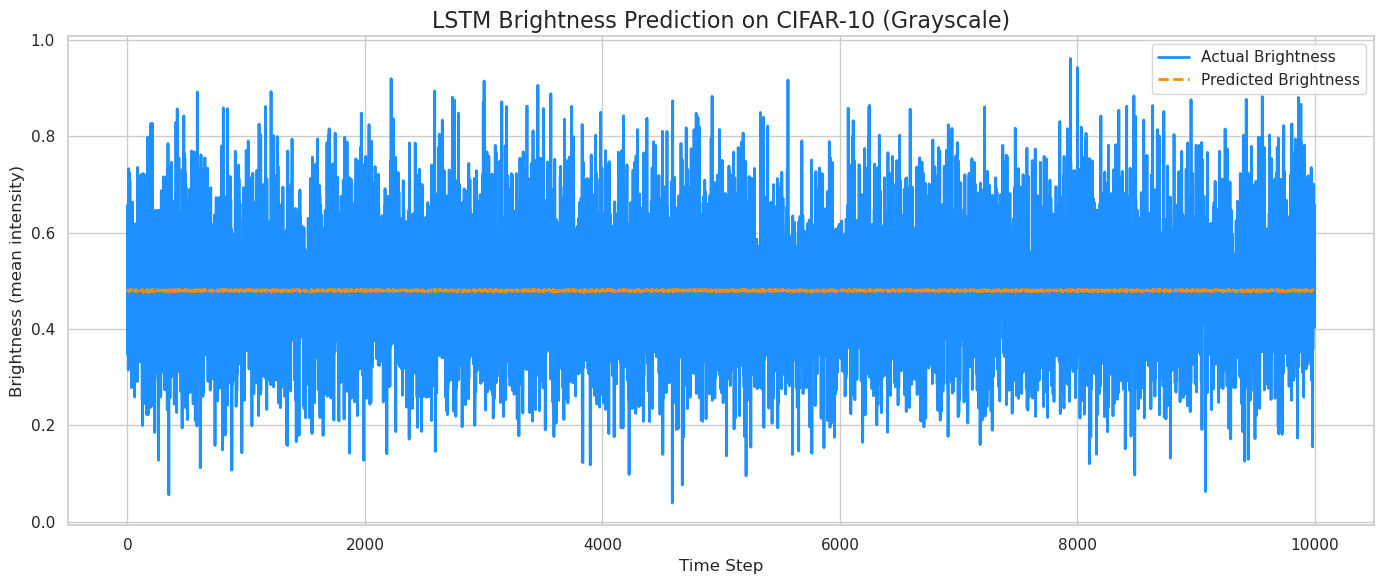

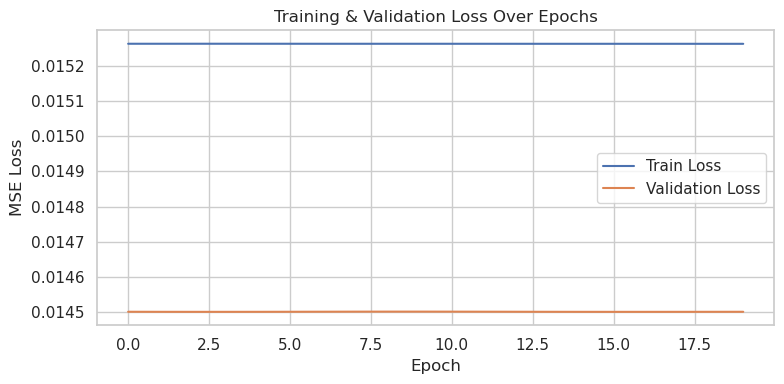

In [10]:

# Evaluate and predict
y_pred = model.predict(X_test)

# Advanced visualization
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')

# Plot predictions vs actual
plt.plot(y_test, label='Actual Brightness', linewidth=2, color='dodgerblue')
plt.plot(y_pred, label='Predicted Brightness', linewidth=2, color='darkorange', linestyle='--')
plt.title("LSTM Brightness Prediction on CIFAR-10 (Grayscale)", fontsize=16)
plt.xlabel("Time Step")
plt.ylabel("Brightness (mean intensity)")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Plot training loss
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Train Loss')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.tight_layout()
plt.show()
